### What is Ridge Regression ?
#### Ridge Regression is a type of linear regression but with a small twist! It is used when our model is too complex and is overfitting the training data, meaning it performs well on training data but poorly on new, unseen data. It is an L2 type regression which adds reguralization to coefficients.
### How does Ridge Regression work ?
#### It penalizes large coefficients (the weights assigned to features) to prevent overfitting. It adds a term called L2 Regularization, which keeps the coefficients small by adding a penalty term equal to the square of the coefficient values. This prevents extreme values for the coefficients, making the model more stable and generalizable.
### Advantages of using Ridge Regression
#### Helps prevent overfitting by penalizing large coefficients.
#### Works well when features are correlated (multicollinearity).
#### Can be used in various domains like finance, healthcare, and marketing.
#### Requires feature scaling before training.

#### In regression problems, we don’t use accuracy percentage like classification models. Instead, we measure the model's performance using metrics like:
##### ✔ R² Score (Coefficient of Determination) → Measures how well predictions match actual values.
##### ✔ Mean Absolute Error (MAE) → Average absolute difference between actual & predicted values.
##### ✔ Mean Squared Error (MSE) & RMSE → Penalizes larger errors more.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(sns.load_dataset("tips"))
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
76,17.92,3.08,Male,Yes,Sat,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2


In [3]:
# convert categorical into numerical values
df = pd.get_dummies(df,drop_first=True)
df.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [4]:
#define target values
X = df.drop(columns=['total_bill'])
y = df['total_bill']
X.head()

,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.01,2,True,True,False,False,True,True
1,1.66,3,False,True,False,False,True,True
2,3.50,3,False,True,False,False,True,True
3,3.31,2,False,True,False,False,True,True
4,3.61,4,True,True,False,False,True,True


In [5]:
#training and splitting the data using train test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Standard Scaler to scale data between 0 to 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#using ridge regression with alpha = 1.0 higher value for stronger reguralization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

Ridge()

In [8]:
#get predictions
y_pred = ridge.predict(X_test)

In [9]:
#calculate mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Error : {r2_score:.2f}")
# print(f"Coeficients : {ridge.coef_}")

Mean Squared Error: 31.92
R2 Error : 0.62


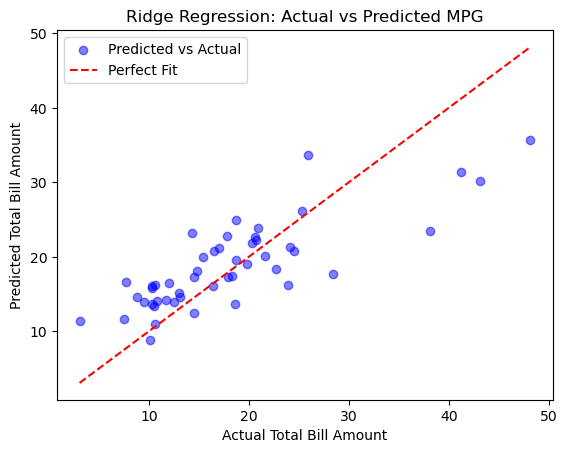

In [10]:
#Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Total Bill Amount")
plt.ylabel("Predicted Total Bill Amount")
plt.title("Ridge Regression: Actual vs Predicted MPG")
plt.legend()
plt.show()